In [4]:
from data_formatting import *
from architectures import T_UNET_IR
from training import *
from evaluation import *
import torch
import os
import datetime
import torch.nn as nn
import torch.nn.functional as F 
import torch.optim as optim
import pickle 
import pandas as pd
import numpy as np

In [5]:
path_test = "D:\IR_blobs\IR_blobs_github\data_IR_final\localization\localization_test.csv"
path_train = "D:\IR_blobs\IR_blobs_github\data_IR_final\localization\localization_train.csv"

In [11]:
df_test = pd.read_csv(path_test)
df_train = pd.read_csv(path_train)

In [12]:
#pd.set_option('display.max_rows', None)

In [13]:
pd.set_option('display.max_columns', None)

In [14]:
df_train 

,Pixel 1,Pixel 2,Pixel 3,Pixel 4,Pixel 5,Pixel 6,Pixel 7,Pixel 8,Pixel 9,Pixel 10,Pixel 11,Pixel 12,Pixel 13,Pixel 14,Pixel 15,Pixel 16,Pixel 17,Pixel 18,Pixel 19,Pixel 20,Pixel 21,Pixel 22,Pixel 23,Pixel 24,Pixel 25,Pixel 26,Pixel 27,Pixel 28,Pixel 29,Pixel 30,Pixel 31,Pixel 32,Pixel 33,Pixel 34,Pixel 35,Pixel 36,Pixel 37,Pixel 38,Pixel 39,Pixel 40,Pixel 41,Pixel 42,Pixel 43,Pixel 44,Pixel 45,Pixel 46,Pixel 47,Pixel 48,Pixel 49,Pixel 50,Pixel 51,Pixel 52,Pixel 53,Pixel 54,Pixel 55,Pixel 56,Pixel 57,Pixel 58,Pixel 59,Pixel 60,Pixel 61,Pixel 62,Pixel 63,Pixel 64,session,target_coordinates,people_#
0,16.12,16.36,16.48,16.52,16.87,16.84,16.17,16.36,15.92,16.36,16.50,16.52,16.81,16.43,16.24,16.30,16.66,16.26,16.45,16.29,16.73,16.79,16.23,16.67,16.29,16.01,16.10,16.42,16.64,16.34,16.73,16.09,15.88,16.02,16.41,16.27,16.58,16.52,16.03,16.36,15.90,16.24,16.18,16.33,16.46,16.77,16.27,15.71,14.97,15.26,15.92,15.41,16.46,16.07,15.58,15.00,14.70,15.25,14.87,15.13,15.22,15.84,15.27,14.37,0,[],0
1,16.22,16.34,16.50,16.50,16.97,16.90,16.50,16.54,15.92,16.27,16.43,16.63,16.89,16.42,16.31,16.39,16.73,16.38,16.42,16.26,16.75,16.89,16.25,16.67,16.32,16.13,16.42,16.48,16.66,16.40,16.88,16.41,16.11,16.13,16.35,16.38,16.64,16.44,16.07,16.34,16.04,16.25,16.23,16.46,16.55,16.75,16.38,15.94,15.12,15.45,15.92,15.41,16.49,16.14,15.71,15.00,14.94,15.38,15.04,15.03,15.38,15.84,15.25,14.40,0,[],0
2,16.24,16.27,16.30,16.57,16.99,17.11,16.50,16.38,16.05,16.19,16.36,16.59,16.84,16.48,16.27,16.48,16.55,16.21,16.29,16.25,16.75,16.84,16.25,16.54,16.27,16.09,16.42,16.43,16.66,16.21,16.78,16.48,16.22,16.09,16.27,16.28,16.53,16.29,16.02,16.20,16.14,16.05,16.05,16.29,16.51,16.75,16.34,15.86,14.96,15.42,15.85,15.21,16.43,16.10,15.74,15.06,14.72,15.34,14.94,15.07,15.34,15.70,15.25,14.54,0,[],0
3,16.51,16.32,16.32,16.64,16.93,17.15,16.56,16.47,16.14,16.17,16.34,16.72,16.84,16.50,16.19,16.43,16.44,16.11,16.32,16.38,16.75,16.90,16.31,16.57,16.38,16.22,16.42,16.48,16.66,16.24,16.82,16.50,16.18,15.95,16.38,16.32,16.57,16.19,16.07,16.17,16.16,16.01,16.14,16.19,16.37,16.82,16.34,15.84,14.93,15.42,15.77,15.18,16.55,16.15,15.75,15.34,14.94,15.14,14.99,15.14,15.40,15.67,15.25,14.57,0,[],0
4,16.43,16.46,16.46,16.73,16.92,17.29,16.45,16.43,16.16,16.17,16.46,16.61,16.84,16.63,16.17,16.42,16.49,16.02,16.39,16.54,16.75,16.85,16.39,16.45,16.21,16.24,16.35,16.56,16.66,16.25,16.83,16.37,15.90,15.92,16.48,16.27,16.64,16.30,16.08,16.17,16.16,15.93,16.09,16.04,16.28,16.83,16.40,15.57,14.79,15.55,15.69,15.30,16.44,16.10,15.62,15.40,14.86,14.96,14.93,15.43,15.35,15.60,15.12,14.52,0,[],0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42710,20.78,18.93,17.46,17.17,17.64,18.14,17.57,18.54,20.10,19.27,17.82,17.34,17.68,17.84,19.82,21.44,17.43,17.38,17.40,17.45,17.52,18.22,19.74,20.23,16.86,16.93,17.34,17.59,17.50,17.55,17.67,17.94,16.73,17.04,17.24,17.10,17.21,17.50,17.13,17.45,17.04,17.83,17.33,16.96,16.98,17.67,16.99,16.91,19.21,18.93,17.40,16.43,17.03,16.87,16.43,16.32,19.66,17.30,16.33,16.46,16.27,16.57,16.72,15.40,268,"[(0, 0), (7, 1), (0, 7)]",3
42711,20.64,18.66,17.45,17.32,17.77,18.04,18.63,19.92,20.15,19.11,17.77,17.49,17.42,17.65,19.83,20.97,17.17,17.43,17.19,16.97,17.48,17.95,18.80,18.30,16.90,16.91,17.17,17.42,17.27,17.52,17.51,17.70,16.83,16.94,17.15,16.98,17.16,17.20,16.88,17.53,17.15,17.89,17.23,17.00,17.16,17.82,17.16,16.77,18.98,18.77,17.37,16.31,17.24,17.01,16.59,16.09,19.29,17.49,16.10,16.22,16.09,16.44,16.17,15.99,268,"[(0, 0), (7, 1), (0, 7)]",3
42712,20.97,18.72,17.37,17.44,17.66,18.24,19.46,20.88,20.13,19.00,17.59,17.46,17.61,17.92,19.90,20.69,17.02,16.96,17.30,17.16,17.51,18.06,17.55,17.57,16.77,16.90,17.17,17.19,17.23,17.40,17.68,17.42,16.80,16.92,17.17,16.97,17.25,17.41,16.91,17.27,16.81,17.96,17.19,16.93,17.14,17.61,16.94,16.59,18.97,18.39,17.17,1

In [15]:
#df_test = pd.read_csv('localization_test.csv')
#df_train = pd.read_csv('localization_train.csv')

In [16]:
df_train

,Pixel 1,Pixel 2,Pixel 3,Pixel 4,Pixel 5,Pixel 6,Pixel 7,Pixel 8,Pixel 9,Pixel 10,Pixel 11,Pixel 12,Pixel 13,Pixel 14,Pixel 15,Pixel 16,Pixel 17,Pixel 18,Pixel 19,Pixel 20,Pixel 21,Pixel 22,Pixel 23,Pixel 24,Pixel 25,Pixel 26,Pixel 27,Pixel 28,Pixel 29,Pixel 30,Pixel 31,Pixel 32,Pixel 33,Pixel 34,Pixel 35,Pixel 36,Pixel 37,Pixel 38,Pixel 39,Pixel 40,Pixel 41,Pixel 42,Pixel 43,Pixel 44,Pixel 45,Pixel 46,Pixel 47,Pixel 48,Pixel 49,Pixel 50,Pixel 51,Pixel 52,Pixel 53,Pixel 54,Pixel 55,Pixel 56,Pixel 57,Pixel 58,Pixel 59,Pixel 60,Pixel 61,Pixel 62,Pixel 63,Pixel 64,session,target_coordinates,people_#
0,16.12,16.36,16.48,16.52,16.87,16.84,16.17,16.36,15.92,16.36,16.50,16.52,16.81,16.43,16.24,16.30,16.66,16.26,16.45,16.29,16.73,16.79,16.23,16.67,16.29,16.01,16.10,16.42,16.64,16.34,16.73,16.09,15.88,16.02,16.41,16.27,16.58,16.52,16.03,16.36,15.90,16.24,16.18,16.33,16.46,16.77,16.27,15.71,14.97,15.26,15.92,15.41,16.46,16.07,15.58,15.00,14.70,15.25,14.87,15.13,15.22,15.84,15.27,14.37,0,[],0
1,16.22,16.34,16.50,16.50,16.97,16.90,16.50,16.54,15.92,16.27,16.43,16.63,16.89,16.42,16.31,16.39,16.73,16.38,16.42,16.26,16.75,16.89,16.25,16.67,16.32,16.13,16.42,16.48,16.66,16.40,16.88,16.41,16.11,16.13,16.35,16.38,16.64,16.44,16.07,16.34,16.04,16.25,16.23,16.46,16.55,16.75,16.38,15.94,15.12,15.45,15.92,15.41,16.49,16.14,15.71,15.00,14.94,15.38,15.04,15.03,15.38,15.84,15.25,14.40,0,[],0
2,16.24,16.27,16.30,16.57,16.99,17.11,16.50,16.38,16.05,16.19,16.36,16.59,16.84,16.48,16.27,16.48,16.55,16.21,16.29,16.25,16.75,16.84,16.25,16.54,16.27,16.09,16.42,16.43,16.66,16.21,16.78,16.48,16.22,16.09,16.27,16.28,16.53,16.29,16.02,16.20,16.14,16.05,16.05,16.29,16.51,16.75,16.34,15.86,14.96,15.42,15.85,15.21,16.43,16.10,15.74,15.06,14.72,15.34,14.94,15.07,15.34,15.70,15.25,14.54,0,[],0
3,16.51,16.32,16.32,16.64,16.93,17.15,16.56,16.47,16.14,16.17,16.34,16.72,16.84,16.50,16.19,16.43,16.44,16.11,16.32,16.38,16.75,16.90,16.31,16.57,16.38,16.22,16.42,16.48,16.66,16.24,16.82,16.50,16.18,15.95,16.38,16.32,16.57,16.19,16.07,16.17,16.16,16.01,16.14,16.19,16.37,16.82,16.34,15.84,14.93,15.42,15.77,15.18,16.55,16.15,15.75,15.34,14.94,15.14,14.99,15.14,15.40,15.67,15.25,14.57,0,[],0
4,16.43,16.46,16.46,16.73,16.92,17.29,16.45,16.43,16.16,16.17,16.46,16.61,16.84,16.63,16.17,16.42,16.49,16.02,16.39,16.54,16.75,16.85,16.39,16.45,16.21,16.24,16.35,16.56,16.66,16.25,16.83,16.37,15.90,15.92,16.48,16.27,16.64,16.30,16.08,16.17,16.16,15.93,16.09,16.04,16.28,16.83,16.40,15.57,14.79,15.55,15.69,15.30,16.44,16.10,15.62,15.40,14.86,14.96,14.93,15.43,15.35,15.60,15.12,14.52,0,[],0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42710,20.78,18.93,17.46,17.17,17.64,18.14,17.57,18.54,20.10,19.27,17.82,17.34,17.68,17.84,19.82,21.44,17.43,17.38,17.40,17.45,17.52,18.22,19.74,20.23,16.86,16.93,17.34,17.59,17.50,17.55,17.67,17.94,16.73,17.04,17.24,17.10,17.21,17.50,17.13,17.45,17.04,17.83,17.33,16.96,16.98,17.67,16.99,16.91,19.21,18.93,17.40,16.43,17.03,16.87,16.43,16.32,19.66,17.30,16.33,16.46,16.27,16.57,16.72,15.40,268,"[(0, 0), (7, 1), (0, 7)]",3
42711,20.64,18.66,17.45,17.32,17.77,18.04,18.63,19.92,20.15,19.11,17.77,17.49,17.42,17.65,19.83,20.97,17.17,17.43,17.19,16.97,17.48,17.95,18.80,18.30,16.90,16.91,17.17,17.42,17.27,17.52,17.51,17.70,16.83,16.94,17.15,16.98,17.16,17.20,16.88,17.53,17.15,17.89,17.23,17.00,17.16,17.82,17.16,16.77,18.98,18.77,17.37,16.31,17.24,17.01,16.59,16.09,19.29,17.49,16.10,16.22,16.09,16.44,16.17,15.99,268,"[(0, 0), (7, 1), (0, 7)]",3
42712,20.97,18.72,17.37,17.44,17.66,18.24,19.46,20.88,20.13,19.00,17.59,17.46,17.61,17.92,19.90,20.69,17.02,16.96,17.30,17.16,17.51,18.06,17.55,17.57,16.77,16.90,17.17,17.19,17.23,17.40,17.68,17.42,16.80,16.92,17.17,16.97,17.25,17.41,16.91,17.27,16.81,17.96,17.19,16.93,17.14,17.61,16.94,16.59,18.97,18.39,17.17,1

In [18]:
seq_len = 8
collection_train_seq = prepare_data_localization(df_train, sequence=True, seq_len=seq_len)
collection_test_seq = prepare_data_localization(df_test, sequence=True, seq_len=seq_len)

In [20]:
collection_train_seq[39004][0].shape

(8, 1, 8, 8)

In [21]:
len(collection_test_seq)

10511

In [22]:
interpolate = False
window_size = 8
path_to_save = "D:/IR_blobs/IR_blobs_github/models"

In [23]:
train_set, test_set = create_datasets(collection_train_seq, collection_test_seq)

In [41]:
batch_size = 64
num_epochs = 500
interpolate = False
dim_dim = [8, 16]
std = 0.008
patience = 20
learning_rate = 0.0007
date = 120624
code_word = f"clstm_unet_8_16_len{window_size}_shrink_std{std}_lr{learning_rate}_pt{patience}_{date}"

In [69]:
train_loader = dataset_to_loader(train_set, batch_size, balancing = False, shuffle = True)
test_loader = dataset_to_loader(test_set, batch_size, balancing = False, shuffle = False)

In [43]:
#model = CLSTM_UNET_tiny(features=dim_dim, hidden_dims=dim_dim, incl_botneck = False)
model = T_UNET_IR(features=dim_dim, hidden_dims=dim_dim, incl_botneck = False)
# Move the model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

T_UNET_IR(
  (ups): ModuleList(
    (0): ConvTranspose2d(32, 16, kernel_size=(2, 2), stride=(2, 2))
    (1): DoubleConv(
      (conv): Sequential(
        (0): Conv2d(32, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (4): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (5): ReLU(inplace=True)
      )
    )
    (2): DoubleConv(
      (conv): Sequential(
        (0): Conv2d(24, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (4): BatchNorm2d(8, eps=1e-05, momentum=0.1, affi

In [44]:
criterion = FocalLoss(alpha = 0.8, gamma = 4.0, reduction = 'sum').to(device)
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

In [45]:
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f"Total number of trainable parameters: {total_params}")

Total number of trainable parameters: 64985


In [46]:
for frames, labels in train_loader:
    print(frames.shape, labels.shape)
    print(frames[1], labels[1])
    # Process the frames and labels
    break 

torch.Size([64, 8, 1, 8, 8]) torch.Size([64, 8, 8])
tensor([[[[1.8700, 1.9600, 1.7000, 2.0400, 2.9100, 3.7800, 2.2000, 2.4200],
          [1.3400, 1.4100, 2.0500, 1.8400, 3.6700, 4.5200, 2.5500, 2.0900],
          [1.5300, 1.6500, 1.8900, 1.9300, 2.8500, 3.6800, 2.1600, 2.1800],
          [1.6000, 1.7500, 2.0200, 1.9800, 2.1000, 1.7500, 2.2600, 1.6600],
          [1.3700, 1.6600, 1.6400, 1.7900, 1.8400, 1.9900, 1.4800, 1.6700],
          [1.5100, 1.4900, 1.4400, 1.6000, 1.6500, 2.4100, 1.6400, 1.0500],
          [0.5700, 0.8400, 1.1000, 1.0300, 1.5600, 1.2500, 1.0000, 0.7800],
          [0.8100, 0.3000, 0.4200, 0.7300, 0.5500, 0.9300, 1.0000, 0.0000]]],


        [[[1.7100, 1.7300, 1.6100, 1.9500, 2.8500, 3.1600, 1.9800, 2.1500],
          [1.2000, 1.2900, 1.8800, 2.2400, 4.4700, 3.5100, 1.9200, 1.8900],
          [1.2500, 1.4000, 1.8500, 1.9200, 3.2400, 3.1400, 1.7000, 1.9100],
          [1.3300, 1.5600, 1.8100, 1.8000, 1.7600, 1.7500, 2.0600, 1.4700],
          [1.3400, 1.4700, 1.530

dim_dim = [8, 16]
batch_size = 64
model = T_UNET_IR(features=dim_dim, hidden_dims=dim_dim, incl_botneck = False)
code_word = 'model_EXP_LENGTHclstm_unet_8_16_len8_shrink_std0.01_lr0.0007_pt20_run1.pt.pt'
model.load_state_dict(torch.load(f'{code_word}'))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

In [40]:
#model.load_state_dict(torch.load(f'{path_to_save}/model_{code_word}.pt'))
pixel_accuracy, pixel_recall, pixel_precision, image_level_accuracy, image_level_accuracy_relaxed, tolerable_ratio, misclassified_samples, mis_idxs = evaluation_of_detection_joint(model, train_loader, device, margin_of_error=0, interpolate=False, temp_threshold=0.7, sequence = True, slack = 1)

Pixel-Level Accuracy: 0.9992985740350705
Pixel-Level Recall: 0.9875915153391873
Pixel-Level Precision: 0.9921009654375577
Image-Level Accuracy: 0.09561128526645768
Image-Level Accuracy Relaxed: 62.11912225705329
% tolerable examples with only 1 fp: 0.5783699059561128


In [47]:
run = 1
code_word = f"{code_word}_run{run}"
#noise002_learningrate0004_length8_16_32_shrink
model, loss_batch, loss_epoch, learniung_rate_list = network_training_detect(model, train_loader, criterion, optimizer, num_epochs, code_word, path_to_save, interpolate = False, sequence = True, add_noise = True, patience = patience, std = std)

current learning rate:0.0007
EPOCH 0: Accuracy: 0.9718
Recall: 0.1901860237121582 
tp: 17197, fn: 73225, fp: 433, tn: 2522393
Epoch loss: 0.39392596686428244
EPOCH 1: Accuracy: 0.9916
Recall: 0.7648912668228149 
tp: 69163, fn: 21259, fp: 615, tn: 2522211
Epoch loss: 0.04802344714329347
EPOCH 2: Accuracy: 0.9936
Recall: 0.822100818157196 
tp: 74336, fn: 16086, fp: 528, tn: 2522298
Epoch loss: 0.0373113254701199
EPOCH 3: Accuracy: 0.9945
Recall: 0.8463426828384399 
tp: 76528, fn: 13894, fp: 512, tn: 2522314
Epoch loss: 0.03309551413611839
EPOCH 4: Accuracy: 0.9951
Recall: 0.8647674322128296 
tp: 78194, fn: 12228, fp: 453, tn: 2522373
Epoch loss: 0.029639382398509214
EPOCH 5: Accuracy: 0.9954
Recall: 0.8731724619865417 
tp: 78954, fn: 11468, fp: 442, tn: 2522384
Epoch loss: 0.028114647350528023
EPOCH 6: Accuracy: 0.9959
Recall: 0.8846187591552734 
tp: 79989, fn: 10433, fp: 407, tn: 2522419
Epoch loss: 0.025889306032860823
EPOCH 7: Accuracy: 0.9958
Recall: 0.8848731517791748 
tp: 80012, fn

KeyboardInterrupt: 

In [75]:
from evaluation import *

Using device: cuda


In [76]:
#model.load_state_dict(torch.load(f'{path_to_save}/model_{code_word}.pt'))
results_dict = evaluation_of_detection_joint(model, test_loader, device, margin_of_error=0, interpolate=False, temp_threshold=0.7, sequence = True, slack = 1)

Pixel-Level Accuracy: 0.9985996812862715
Pixel-Level Recall: 0.9777441554004588
Pixel-Level Precision: 0.9763146352161411
Image-Level Accuracy: 0.9623251831414709
Image-Level Accuracy Relaxed: 0.01845685472362287
% tolerable examples with only 1 fp: 0.0


In [77]:
plt.plot(loss_epoch)

NameError: name 'loss_epoch' is not defined

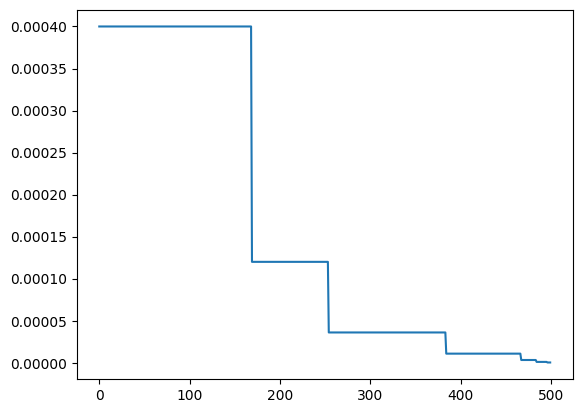

In [41]:
plt.plot(learning_rate_list)